In [ ]:
data_url = "https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2019/2019-05-28/winemag-data-130k-v2.csv"

In [ ]:
import pandas as pd

In [ ]:
data_df = pd.read_csv(data_url, sep=",")

In [ ]:
data_df.head(2)

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos


In [ ]:
pip install pymorphy2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 55 kB 2.2 MB/s 
     |████████████████████████████████| 8.2 MB 7.0 MB/s 


In [ ]:
from pymorphy2 import MorphAnalyzer
from nltk.tokenize import wordpunct_tokenize

morph = MorphAnalyzer()

In [ ]:
from wordcloud import WordCloud
import nltk

In [ ]:
def lemmatize(x):
    if type(x) != str:
        return ""
    text = wordpunct_tokenize(x)
    result = []
    for word in text:
        if word.isalpha():
            nf = morph.parse(word)[0].normal_form
            result.append(nf)
    return " ".join(result)

In [ ]:
text = ' '.join(data_df["description"].head(2000).apply(lemmatize).values)

In [ ]:
import matplotlib.pyplot as plt

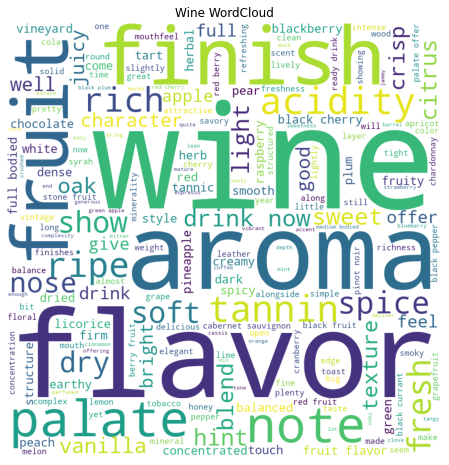

In [ ]:
wordcloud = WordCloud(
    background_color ='white',
    width = 800,
    height = 800, 
).generate(text)

plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud)
plt.axis("off") 
plt.title('Wine WordCloud')
plt.show();

In [ ]:
df_desc = data_df.groupby("description").agg({"points": "mean"}).sort_values(by="points", ascending=False)
df_desc.head(5)

,points
description,
"Full of ripe fruit, opulent and concentrated, this is a fabulous and impressive wine. It has a beautiful line of acidity balanced with ripe fruits. The wood aging is subtle, just a hint of smokiness and toast. This is one of those wines, from a great white wine vintage, that will age many years. Drink from 2024.",100.0
"Tasted in a flight of great and famous Napa wines, this Cardinale stood at the head of the pack. Starts with a very fine nose of cedar, cassis, ripe blackberries and violets, then turns dramatic and refined in the mouth. Shows vast depth and length, with the finish a full minute of sweet fruits and spices. Marvelous tannins, so plush and elegant, so powerful yet refined. The grapes hail from Mt. Veeder, Howell Mountain, Stags Leap and Oakville, and the blend contains 14% Merlot. As good as it is now, it will improve for at least eight years.",100.0
"This wine dazzles with perfection. Sourced from vineyards throughout Sonoma County, it refutes the belief that a great Cabernet must come from a single vineyard. It does not. The master's art of blending, coupled with demanding vineyard practices lends completeness. The blend is 85% Merlot, 10% Cabernet Franc and 5% Malbec, making it an extraordinary success despite the absence of Cabernet Sauvignon. Give credit to winemaker Pierre Seillan. The wine itself is absolutely dry. It starts with a tug of tannins, baring flavors of blackberries, black currants, minerals and new oak, with earthy, herbal and meaty complexities. This is a magnificent wine; it dazzles now and should evolve over the next 6–8 years.",100.0
"This wine contains some material over 100 years old, but shows no signs of fragility. Instead, it's concentrated through age and should hold in the bottle indefinitely. It's dark coffee-brown in color, with delectable aromas of rancio, dried fig, molasses and black tea, yet despite enormous concentration avoids excessive weight. And it's amazingly complex and fresh on the nearly endless finish.",100.0
"This is the finest Cheval Blanc for many years. It is, quite simply, magnificent. The wine shows the greatness of Cabernet Franc in the vintage, with 57% of the variety in the blend. It is beautifully structured and perfumed, with velvety tannins, balanced acidity and swathes of black-currant and black-cherry fruits. It's well on course to becoming a legendary wine.",100.0


In [ ]:
df_desc.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2000 entries, Full of ripe fruit, opulent and concentrated, this is a fabulous and impressive wine. It has a beautiful line of acidity balanced with ripe fruits. The wood aging is subtle, just a hint of smokiness and toast. This is one of those wines, from a great white wine vintage, that will age many years. Drink from 2024. to This wine is opulent and rich without losing sight of the freshness of the vintage. Layers of new wood (100%) are blended with rich and perfumed fruits. At the same time, the acidity goes right through the wine, indicating an impressive future. It comes from a tiny patch of vines that gave two barrels. Drink from 2022.
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   points  2000 non-null   float64
dtypes: float64(1)
memory usage: 31.2+ KB


In [ ]:
data_desc = data_df.sort_values(by="points", ascending=False)
data_desc.head(2)

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
114972,114972,Portugal,"A powerful and ripe wine, strongly influenced ...",Nacional Vintage,100,650.0,Port,NaN,NaN,Roger Voss,@vossroger,Quinta do Noval 2011 Nacional Vintage (Port),Port,Quinta do Noval
89729,89729,France,This new release from a great vintage for Char...,Le Mesnil Blanc de Blancs Brut,100,617.0,Champagne,Champagne,NaN,Roger Voss,@vossroger,Salon 2006 Le Mesnil Blanc de Blancs Brut Char...,Chardonnay,Salon


In [ ]:
df_desc = data_desc.head(2000)
text_desc = ' '.join(df_desc["description"].apply(lemmatize).values)

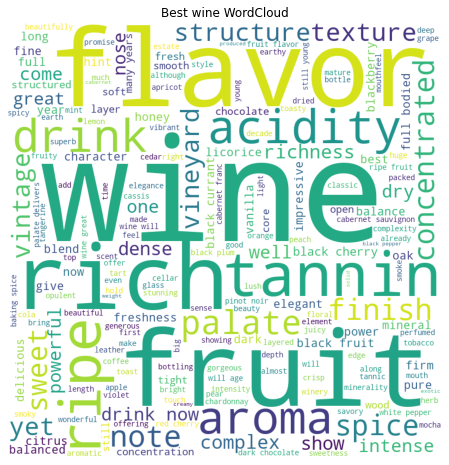

In [ ]:
wordcloud = WordCloud(
    background_color ='white',
    width = 800,
    height = 800, 
).generate(text_desc)

plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud)
plt.axis("off") 
plt.title('Best wine WordCloud')
plt.show();